In [ ]:
!curl -LJO https://raw.githubusercontent.com/mvera1412/TA136-TB056-TB057-8625/main/data/anime.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.5M  100 13.5M    0     0  13.3M      0  0:00:01  0:00:01 --:--:-- 13.3M


In [ ]:
import pandas as pd
import re
import numpy as np
from sentence_transformers import SentenceTransformer
from matplotlib import pyplot as plt


df = pd.read_csv('anime.csv')
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

#Uso los titulos como indice aunque igualmente me sigo quedando con la columna
df = df.set_index(df.columns[0], drop=False)

display(df)

,title,680973,682775,682809,684730,684840,684862,685362,686426,686489,...,1388155,1389510,1389679,1390094,1391050,1392101,1392278,1392522,1393478,1393558
title,,,,,,,,,,,,,,,,,,,,,
"""Deji"" Meets Girl","""Deji"" Meets Girl",-1.0,8.0,7.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
"""Ippon"" again!","""Ippon"" again!",-1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,2.0,...,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0
"'Tis Time for ""Torture,"" Princess","'Tis Time for ""Torture,"" Princess",-1.0,8.0,7.0,-1.0,8.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,8.0,-1.0,6.0,-1.0,-1.0,6.0,-1.0
"'Tis Time for ""Torture,"" Princess Season 2","'Tis Time for ""Torture,"" Princess Season 2",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0 Years Old Child Starting Dash Story,0 Years Old Child Starting Dash Story,-1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gdgd men's Party,gdgd men's Party,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0
makuranodanshi,makuranodanshi,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,...,5.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
number24,number24,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0


## Embedding

Muestro el embedding para la cadena "attack on titan" (que será la que estará en el dataframe y será comparada) el embedding es en simples palabras un vector que captura el significado de la cadena de texto.

Cadenas que expresen ideas similares como "gigante" y "grande" seberían tener una dirección similar en el espacio.

In [ ]:
#Hago el embedding de attack on titan

embedding = model.encode('attack on titan')

print(embedding)


[ 6.14267215e-02  6.41285852e-02 -6.40884554e-03  1.57663301e-01
  9.88163799e-02 -1.04965784e-01  1.73131190e-02 -3.06840204e-02
  2.58461945e-02  9.47418585e-02  1.50090143e-01  1.91821735e-02
 -5.16959913e-02  2.39569694e-01  2.20917150e-01  3.65647525e-02
  9.16957855e-03  1.57180503e-01 -2.12613970e-01 -4.49735411e-02
 -2.15962697e-02 -6.90865815e-02  3.13193873e-02 -5.20765558e-02
  4.92268242e-02  6.62255660e-02  3.79863977e-02  1.02321461e-01
  6.92559108e-02 -1.42283887e-01  1.20635375e-01 -1.31324932e-01
  1.73731893e-02  1.00065134e-01  3.86650264e-02  3.55378799e-02
 -1.47010833e-01 -1.22440932e-02 -7.65754431e-02  1.01665474e-01
  2.32541524e-02 -1.32615879e-01 -1.28548577e-01 -1.07153812e-02
 -4.50816844e-03 -1.37764867e-02 -9.41828191e-02  5.13562337e-02
 -2.85531580e-02  2.29998212e-02 -2.26086285e-02  3.28260154e-01
  1.79681465e-01  7.56501108e-02 -5.57879396e-02 -6.66005686e-02
 -8.41545537e-02 -9.80175361e-02 -5.74528705e-03  1.71617001e-01
  1.45795792e-01  2.96399

## Buscador

Es posible crear un buscador tomando el embedding del input y comparando con los embeddings de todas las cadenas en mi dataframe. Para eso puedo usar la similitud coseno:

$$ sc = \frac{u \cdot v}{||u||\,||v||}$$

Se dejan las funciones pedidas en la clase solamente, para evitar repetición.

In [ ]:
class Buscador:

  #Preprocesamiento
  def preproceso(self, text):
    text = text.lower() #Paso a minusculas
    text = re.sub(r'\s+', ' ', text.strip()) #Unifico espacios y saco los de los costados
    return text


  def __init__(self, titulos):
    self.titulos = titulos.tolist() #Me creo mi lista de titulos
    titulos_m = titulos.dropna().apply(self.preproceso).tolist()
    self.df = model.encode(titulos_m, normalize_embeddings=True) #Los genero normalizados así zafo de la norma para el sc

  #Similitud coseno para vectores normalizados
  def sc(self, u, v):
    return np.dot(u,v)

  def buscar(self, palabra, k):
    embedding = model.encode(self.preproceso(palabra), normalize_embeddings=True)

    similitud = self.sc(self.df, embedding)

    k_max = np.argsort(similitud)[-k:][::-1] #Tomo los k de mayor valor ordenados

    return [self.titulos[i] for i in k_max]



In [ ]:
buscador = Buscador(df['title'])


## Testeo del buscador

Se observa que al buscar "Giant" los primeros resultados tienen explícitamente esa palabra y los siguientes tienen conceptos como "super", "mega", "monster", que se relacionan con algo gigante (ya sea por tamaño o por el concepto de gigante como monstruo).

In [ ]:
print(buscador.buscar("Giant", 15))

['Giant Killing', 'Giant Beasts of Ars', 'SUPER HXEROS', 'Megane-bu!', 'Re:Monster', 'Overlord II', 'Megalobox', 'Super Cub', 'Overlord', 'The Great Warrior Wall', 'Bullbuster', 'Dragon Ball Super', 'Heavy Object', 'Plus-Sized Elf', 'Tearmoon Empire']


## Derivación del Gradiente Descendiente para el Riesgo Empírico Regularizado

Partimos del riesgo empírico regularizado definida sobre las predicciones $\theta_j^\top x_i$:

$$
J(X,\Theta) \;=\; \frac{1}{2}\sum_{(i,j)\in\mathcal R} \big(\theta_j^\top x_i - y_{ij}\big)^2
\;+\; \frac{\lambda}{2}\Big(\sum_{i=1}^{n_\text{items}}\|x_i\|_2^2 \;+\; \sum_{j=1}^{n_\text{users}}\|\theta_j\|_2^2\Big)
$$

Se puede expresar en forma matricial para facilitar luego el cálculo en el código

$$
\boxed{ \;
J(X,\Theta) \;=\; \frac{1}{2}\,\big\|\,M \odot (X\Theta^\top - R)\,\big\|_F^2
\;+\; \frac{\lambda}{2}\,\big( \|X\|_F^2 + \|\Theta\|_F^2 \big)
\;}
$$

Definimos el error escalar, con la mascara para aquellas calificaciones que efectivamente estan dadas
$$
E = M \odot (X\Theta^\top - R)
$$

Derivamos (la derivada de la norma de una matriz al cuadrado es 2 veces esa matriz):

$$
\nabla_X J \;=\; E\,\Theta \;+\; \lambda\, X
$$

$$
\nabla_\Theta J \;=\; E^\top X \;+\; \lambda\, \Theta
$$


Luego queda el paso descendiente

$$
X \leftarrow X - \alpha (E\Theta + \lambda X),\qquad
\Theta \leftarrow \Theta - \alpha (E^\top X + \lambda \Theta).
$$


In [ ]:
nuevo_usuario = np.full(len(df), -1, dtype=float)

series_calificadas = buscador.buscar("Attack", 10)
calificaciones = [10, 9, 8, 10, 5, 5, 1, 5, 3, 2]

# Calificaciones personales (mínimo 10)
cal_dict = dict(zip(series_calificadas, calificaciones))

# Asignamos esas calificaciones a las filas correspondientes
for i, nombre in enumerate(df.iloc[:, 0]):  # primera columna = nombre del anime
    if nombre in calificaciones:
        nuevo_usuario[i] = calificaciones[nombre]


df['new user'] = nuevo_usuario

#Veo las series que se calificaron
print(series_calificadas)


['Strike the Blood', 'ID: INVADED', 'ViVid Strike!', 'Attack on Titan', 'Killing Bites', 'Active Raid', 'Inazma Delivery: Dougyousha Attack-hen', 'Revenger', 'Akame ga Kill!', 'Magical Warfare']


In [ ]:
import numpy as np
import pandas as pd

class FiltroColaborativo:
    def __init__(self):
        self.df = None
        self.R = None         #Matriz de ratings originales
        self.M = None         #Máscara
        self.R_hat = None     #Matriz reconstruida
        self.promedios = None #Promedio por ítem
        self.X = None         #Factores de ítems
        self.Theta = None     #Factores de usuarios
        self.j_hist = []

    def fit(self, df, k=15, iterations=1000, alpha=0.001, lambda_reg=10):
        #Acomodo el df
        self.df = df.set_index('title')

        #Creo mi matriz de calificaciones y saco las dimensiones noramlizo a la maxima calificacion
        self.R = self.df.to_numpy(dtype=float) / 10
        num_items, num_users = self.R.shape

        #Mascara
        self.M = (self.R > 0).astype(float)

        #Saco los promedios para despues, ignoro los -1
        sum_r = np.sum(self.M * self.R, axis=1)
        count_r = np.sum(self.M, axis=1)
        self.promedios = np.divide(sum_r, count_r, out=np.zeros_like(sum_r), where=count_r != 0)

        #Inicializo al azar
        self.X = np.random.rand(num_items, k) * 0.05 # factores de ítems
        self.Theta = np.random.rand(num_users, k) * 0.05 # factores de usuarios

        for it in range(iterations):
            #Error enmascarado
            E = self.M * (self.R - self.X @ self.Theta.T)

            #Gradientes
            X_grad = -E @ self.Theta + lambda_reg * self.X
            Theta_grad = -E.T @ self.X + lambda_reg * self.Theta

            #Actualización
            self.X -= alpha * X_grad
            self.Theta -= alpha * Theta_grad

            J = 0.5  * np.sum(E**2) + 0.5 * lambda_reg * (np.sum(self.X**2) + np.sum(self.Theta**2))

            self.j_hist.append(J)

        #Reconstrucción final
        self.R_hat = (self.X @ self.Theta.T) * 10 #Paso a los valores de calificacion típicos
        self.promedios = self.promedios * 10

    def predict(self, user, item, mezcla=0.5):
        if self.df is None:
            raise ValueError("El modelo no fue entrenado todavía.")

        if user not in self.df.columns:
            raise ValueError(f"Usuario '{user}' no encontrado en columnas.")
        if item not in self.df.index:
            raise ValueError(f"Ítem '{item}' no encontrado en filas.")

        #Obtengo los indices
        idx_item = self.df.index.get_loc(item)
        idx_user = self.df.columns.get_loc(user)

        #Predigo en promedio
        pred = mezcla * self.R_hat[idx_item, idx_user] + (1 - mezcla) * self.promedios[idx_item]

        return float(pred)

    def recomendar(self, user, top_n=5, mezcla=0.5):
        if self.df is None:
            raise ValueError("El modelo no fue entrenado todavía.")
        if user not in self.df.columns:
            raise ValueError(f"Usuario '{user}' no encontrado en columnas.")

        preds_usuario = np.array([self.predict(user, item, mezcla) for item in self.df.index])

        #Filtro ítems ya puntuados
        idx_user = self.df.columns.get_loc(user)
        vistos = self.M[:, idx_user] > 0
        preds_usuario = np.where(vistos, -np.inf, preds_usuario)

        #Top n recomendaciones
        top_idx = np.argsort(preds_usuario)[::-1][:top_n]
        return list(self.df.index[top_idx])



In [ ]:
#Entreno

filtro = FiltroColaborativo()
filtro.fit(df, k=15, iterations=2000, alpha=0.001, lambda_reg=10)

## Costo vs itearción

Se observa una convergencia relativamente rápida en menos de 20 muestras. Esta convergencia violenta podría deberse al alto lambda, ya que hace que mi gradiente en cada paso sea grande.

Text(0.5, 1.0, 'Costo vs Iteraciones')

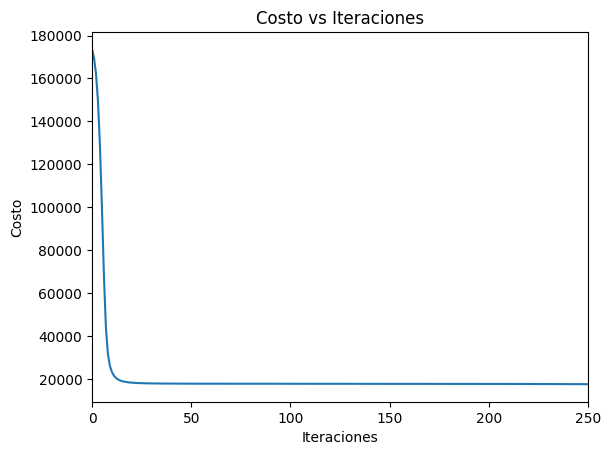

In [ ]:
#Ploteo el riesgo en base a las iteraciones

plt.plot(filtro.j_hist)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.xlim(0, 250)
plt.title('Costo vs Iteraciones')

## Testeo

Es particular que el rating maximo predecido para el nuevo usuario es 5 y no cercano a 10. Una explicación para esto es el alto factor de regularización, que idealmente reduciría el overfitting. Sin embargo, en este caso se tienen pocas muestras (pocas calificaciones), por lo que el factor simplemente penaliza que los parámetros (de donde predecimos la calificacion) den valores altos y no se nota tanto el beneficio.

In [ ]:
#Recomiendo las 10 mejores

print(filtro.recomendar('new user', top_n=10, mezcla=0.5))
print(filtro.predict('new user', 'One Punch Man Season 3', mezcla=0.5))



['One Punch Man Season 3', 'The Fragrant Flower Blooms with Dignity', 'Yozakura-san Chi no Daisakusen 2nd Season', 'Bukiyou na Senpai.', 'Ame to Kimi to', 'Bad Girl', 'Tomodachi no Imouto ga Ore ni dake Uzai', 'Scooped Up by an S-Rank Adventurer!', 'Shinjiteita Nakama-tachi ni Dungeon Okuchi de Korosarekaketa ga Gift "Mugen Gacha" de Level 9999 no Nakama-tachi wo Te ni Irete Moto Party Member to Sekai ni Fukushuu & "Zamaa!" Shimasu!', 'Sakamoto Days Part 2']
5.000000000175652
